In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import os
# import seaborn as sns
# import scipy.stats as stats
import unittest

In [7]:
#Make sure you ran "Battry_Dataset" Notebook first
pd.set_option("display.max_rows", None, "display.max_columns", None)

%store -r df_battery
#df_battery

In [8]:
import numpy as np;
import csv
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold 
import math

import sklearn
import statistics as stcs
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,scale,MinMaxScaler
from scipy.stats import uniform,expon
from sklearn.model_selection import cross_val_score
from time import time
from sklearn.preprocessing import OneHotEncoder

In [9]:
#One hot encoding (alphebetical order)
ohe = OneHotEncoder()
ACE = df_battery.loc[:,['anode','cathode','electrolyte']]
ACE = ohe.fit_transform(ACE)
ACE = pd.DataFrame(ACE.toarray())

ACE_col_name = ['A1','C1','C2','C3','E1','E2','E3']
for i in range(len(ACE.columns)):
    ACE = ACE.rename({ACE.columns[i]: ACE_col_name[i]}, axis=1) 
    
df_battery = pd.concat([ACE, df_battery],axis=1)

In [10]:
data = df_battery

np.random.seed(66)
def data_split (data, test_ratio):
    df = pd.DataFrame(data)
    total_row = df.shape[0]

    test_row = round(total_row * test_ratio)

    train_row = total_row - test_row
    
    indices = np.random.permutation(total_row)
    train_indx, test_idx = indices[:train_row], indices[train_row:]
    train,test = df.iloc[train_indx,:], df.iloc[test_idx,:]
    X_test = test[['A1','C1','C2','C3','E1','E2','E3','Cycle','temperature','discharge_crate']]
#    y_test = test[['Charge_Capacity (Ah)']]
    y_test = test[['Discharge_Capacity (Ah)']]
#    y_test = test[['Charge_Energy (Wh)']]
#    y_test = test[['Discharge_Energy (Wh)']]
#    y_test = test[['Coulombic_Efficiency (%)']]
#    y_test = test[['Energy_Efficiency (%)']]
    X_train = train[['A1','C1','C2','C3','E1','E2','E3','Cycle','temperature','discharge_crate']]
#    y_train = train[['Charge_Capacity (Ah)']]
    y_train = train[['Discharge_Capacity (Ah)']]
#    y_train = train[['Charge_Energy (Wh)']]
#    y_train = train[['Discharge_Energy (Wh)']]
#    y_train = train[['Coulombic_Efficiency (%)']]
#    y_train = train[['Energy_Efficiency (%)']]
    return train,test,X_train,y_train,X_test,y_test
    
train,test,X_train,y_train,X_test,y_test = data_split(data,0.2)
#print(X_train)

In [11]:
#k-fold cross validation
kf = KFold(n_splits=10,random_state =66,shuffle= True)
#print(X_test,y_test,X_train,y_train)

In [12]:
scaler = StandardScaler(with_mean=True,with_std=True)
print(clf.fit(X_test))
print(clf.mean_)

X_test = pd.DataFrame(clf.transform(X_test))

print(clf.fit(X_train))
print(clf.mean_)
X_train = pd.DataFrame(clf.transform(X_train))

NameError: name 'clf' is not defined

In [14]:
rand_para = {'C':range(291,411),'gamma':np.logspace(-2,-1),'kernel':['rbf']}
svm_model =SVR()
n_iteration = 200
Scoring = ['explained_variance','neg_mean_squared_error',"r2"]
random_search = RandomizedSearchCV(svm_model,
                                   param_distributions=rand_para,
                                   cv =5,
                                   scoring=Scoring,
                                   error_score=0,
                                   random_state=66,
                                   return_train_score=True,
                                   n_jobs=-1,
                                   n_iter=n_iteration,
                                   verbose=10,
                                   refit=False)


start = time()

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

[CV 4/5; 91/200] START C=400, gamma=0.019306977288832496, kernel=rbf............
[CV 4/5; 91/200] END C=400, gamma=0.019306977288832496, kernel=rbf; explained_variance: (train=0.684, test=0.598) neg_mean_squared_error: (train=-0.243, test=-0.380) r2: (train=0.675, test=0.563) total time=   0.0s
[CV 5/5; 91/200] START C=400, gamma=0.019306977288832496, kernel=rbf............
[CV 5/5; 91/200] END C=400, gamma=0.019306977288832496, kernel=rbf; explained_variance: (train=0.746, test=0.247) neg_mean_squared_error: (train=-0.196, test=-0.601) r2: (train=0.744, test=0.246) total time=   0.0s
[CV 1/5; 92/200] START C=296, gamma=0.017575106248547922, kernel=rbf............
[CV 1/5; 92/200] END C=296, gamma=0.017575106248547922, kernel=rbf; explained_variance: (train=0.760, test=0.112) neg_mean_squared_error: (train=-0.199, test=-0.581) r2: (train=0.754, test=0.091) total time=   0.0s
[CV 5/5; 97/200] START C=311, gamma=0.05963623316594643, kernel=rbf.............
[CV 5/5; 97/200] END C=311, gam

on.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = co

, test=-0.592) r2: (train=0.747, test=0.075) total time=   0.0s
[CV 2/5; 139/200] START C=327, gamma=0.013257113655901088, kernel=rbf...........
[CV 2/5; 139/200] END C=327, gamma=0.013257113655901088, kernel=rbf; explained_variance: (train=0.724, test=0.114) neg_mean_squared_error: (train=-0.225, test=-0.662) r2: (train=0.715, test=0.085) total time=   0.0s
[CV 1/5; 145/200] START C=402, gamma=0.03556480306223129, kernel=rbf............
[CV 1/5; 145/200] END C=402, gamma=0.03556480306223129, kernel=rbf; explained_variance: (train=0.777, test=0.083) neg_mean_squared_error: (train=-0.183, test=-0.607) r2: (train=0.773, test=0.052) total time=   0.1s
[CV 2/5; 145/200] START C=402, gamma=0.03556480306223129, kernel=rbf............
[CV 2/5; 145/200] END C=402, gamma=0.03556480306223129, kernel=rbf; explained_variance: (train=0.751, test=0.054) neg_mean_squared_error: (train=-0.198, test=-0.687) r2: (train=0.749, test=0.050) total time=   0.0s
[CV 3/5; 145/200] START C=402, gamma=0.03556480

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

[CV 1/5; 177/200] START C=391, gamma=0.020235896477251564, kernel=rbf...........
[CV 1/5; 177/200] END C=391, gamma=0.020235896477251564, kernel=rbf; explained_variance: (train=0.769, test=0.123) neg_mean_squared_error: (train=-0.191, test=-0.577) r2: (train=0.764, test=0.098) total time=   0.0s
[CV 2/5; 177/200] START C=391, gamma=0.020235896477251564, kernel=rbf...........
[CV 2/5; 177/200] END C=391, gamma=0.020235896477251564, kernel=rbf; explained_variance: (train=0.734, test=0.078) neg_mean_squared_error: (train=-0.213, test=-0.678) r2: (train=0.729, test=0.062) total time=   0.0s
[CV 3/5; 177/200] START C=391, gamma=0.020235896477251564, kernel=rbf...........
[CV 3/5; 177/200] END C=391, gamma=0.020235896477251564, kernel=rbf; explained_variance: (train=0.757, test=0.094) neg_mean_squared_error: (train=-0.186, test=-0.753) r2: (train=0.756, test=0.091) total time=   0.0s
[CV 4/5; 177/200] START C=391, gamma=0.020235896477251564, kernel=rbf...........
[CV 4/5; 177/200] END C=391,

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

419875584, kernel=rbf............
[CV 1/5; 66/200] END C=322, gamma=0.010985411419875584, kernel=rbf; explained_variance: (train=0.746, test=0.078) neg_mean_squared_error: (train=-0.213, test=-0.598) r2: (train=0.737, test=0.065) total time=   0.0s
[CV 2/5; 66/200] START C=322, gamma=0.010985411419875584, kernel=rbf............
[CV 2/5; 66/200] END C=322, gamma=0.010985411419875584, kernel=rbf; explained_variance: (train=0.716, test=0.132) neg_mean_squared_error: (train=-0.233, test=-0.652) r2: (train=0.704, test=0.099) total time=   0.0s
[CV 2/5; 180/200] START C=358, gamma=0.021209508879201904, kernel=rbf...........
[CV 2/5; 180/200] END C=358, gamma=0.021209508879201904, kernel=rbf; explained_variance: (train=0.734, test=0.072) neg_mean_squared_error: (train=-0.213, test=-0.682) r2: (train=0.729, test=0.057) total time=   0.0s
[CV 3/5; 180/200] START C=358, gamma=0.021209508879201904, kernel=rbf...........
[CV 3/5; 180/200] END C=358, gamma=0.021209508879201904, kernel=rbf; explaine

change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validati

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

[CV 3/5; 58/200] START C=349, gamma=0.013894954943731374, kernel=rbf............
[CV 3/5; 58/200] END C=349, gamma=0.013894954943731374, kernel=rbf; explained_variance: (train=0.746, test=0.183) neg_mean_squared_error: (train=-0.195, test=-0.677) r2: (train=0.743, test=0.183) total time=   0.0s
[CV 3/5; 63/200] START C=376, gamma=0.013257113655901088, kernel=rbf............
[CV 3/5; 63/200] END C=376, gamma=0.013257113655901088, kernel=rbf; explained_variance: (train=0.746, test=0.187) neg_mean_squared_error: (train=-0.196, test=-0.674) r2: (train=0.743, test=0.187) total time=   0.0s
[CV 4/5; 63/200] START C=376, gamma=0.013257113655901088, kernel=rbf............
[CV 4/5; 63/200] END C=376, gamma=0.013257113655901088, kernel=rbf; explained_variance: (train=0.669, test=0.638) neg_mean_squared_error: (train=-0.255, test=-0.338) r2: (train=0.659, test=0.612) total time=   0.0s
[CV 5/5; 63/200] START C=376, gamma=0.013257113655901088, kernel=rbf............
[CV 5/5; 63/200] END C=376, gam

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

ma=0.025595479226995357, kernel=rbf; explained_variance: (train=0.742, test=0.064) neg_mean_squared_error: (train=-0.206, test=-0.685) r2: (train=0.738, test=0.053) total time=   0.0s
[CV 3/5; 73/200] START C=359, gamma=0.025595479226995357, kernel=rbf............
[CV 3/5; 73/200] END C=359, gamma=0.025595479226995357, kernel=rbf; explained_variance: (train=0.757, test=0.097) neg_mean_squared_error: (train=-0.185, test=-0.751) r2: (train=0.757, test=0.093) total time=   0.0s
[CV 4/5; 73/200] START C=359, gamma=0.025595479226995357, kernel=rbf............
[CV 4/5; 73/200] END C=359, gamma=0.025595479226995357, kernel=rbf; explained_variance: (train=0.693, test=0.563) neg_mean_squared_error: (train=-0.233, test=-0.410) r2: (train=0.688, test=0.529) total time=   0.0s
[CV 5/5; 77/200] START C=331, gamma=0.028117686979742307, kernel=rbf............
[CV 5/5; 77/200] END C=331, gamma=0.028117686979742307, kernel=rbf; explained_variance: (train=0.753, test=0.160) neg_mean_squared_error: (trai

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

RandomizedSearchCV(cv=5, error_score=0, estimator=SVR(), n_iter=200, n_jobs=-1,
                   param_distributions={'C': range(291, 411),
                                        'gamma': array([0.01      , 0.01048113, 0.01098541, 0.01151395, 0.01206793,
       0.01264855, 0.01325711, 0.01389495, 0.01456348, 0.01526418,
       0.01599859, 0.01676833, 0.01757511, 0.0184207 , 0.01930698,
       0.0202359 , 0.02120951, 0.02222996, 0.02329952, 0.02442053,
       0.025595...
       0.04094915, 0.04291934, 0.04498433, 0.04714866, 0.04941713,
       0.05179475, 0.05428675, 0.05689866, 0.05963623, 0.06250552,
       0.06551286, 0.06866488, 0.07196857, 0.0754312 , 0.07906043,
       0.08286428, 0.08685114, 0.09102982, 0.09540955, 0.1       ]),
                                        'kernel': ['rbf']},
                   random_state=66, refit=False, return_train_score=True,
                   scoring=['explained_variance', 'neg_mean_squared_error',
                            'r2'],
       

In [16]:
svm_model_optimal =SVR(kernel ='rbf',gamma=0.03393221771895328,C=387)
np.random.seed(66)
svm_model_optimal.fit(X_train,y_train)
y_predict=svm_model_optimal.predict(X_test)

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
MSE_test = mean_squared_error(y_predict, y_test)
RMSE_test = math.sqrt(MSE_test)
print(RMSE_test)

0.7567643931761531


In [18]:
np.random.seed(66)

svm_model_train =SVR(kernel ='rbf',gamma=0.03393221771895328,C=387)

for train_index, test_index in kf.split(X_train):
    #print("Train:", train_index, "Validation:", test_index)
    X_training, X_validate = X_train.iloc[train_index], X_train.iloc[test_index]
    y_training, y_validate = y_train.iloc[train_index], y_train.iloc[test_index]
    
    np.random.seed(66)
    svm_model_train.fit(X_training,y_training)
    y_train_predicted = svm_model_train.predict(X_validate)

MSE_train = mean_squared_error(y_train_predicted, y_validate)
RMSE_train = math.sqrt(MSE_train)
print(RMSE_train)

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

0.8224697481403188


/Applications/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


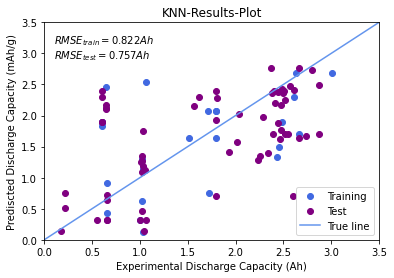

[CV 5/5; 146/200] END C=396, gamma=0.0655128556859551, kernel=rbf; explained_variance: (train=0.767, test=0.169) neg_mean_squared_error: (train=-0.179, test=-0.677) r2: (train=0.767, test=0.151) total time=   0.0s
[CV 1/5; 147/200] START C=296, gamma=0.022229964825261943, kernel=rbf...........
[CV 1/5; 147/200] END C=296, gamma=0.022229964825261943, kernel=rbf; explained_variance: (train=0.769, test=0.112) neg_mean_squared_error: (train=-0.191, test=-0.584) r2: (train=0.764, test=0.087) total time=   0.0s
[CV 2/5; 147/200] START C=296, gamma=0.022229964825261943, kernel=rbf...........
[CV 2/5; 147/200] END C=296, gamma=0.022229964825261943, kernel=rbf; explained_variance: (train=0.731, test=0.062) neg_mean_squared_error: (train=-0.216, test=-0.691) r2: (train=0.726, test=0.045) total time=   0.0s
[CV 1/5; 153/200] START C=398, gamma=0.08685113737513525, kernel=rbf............
[CV 1/5; 153/200] END C=398, gamma=0.08685113737513525, kernel=rbf; explained_variance: (train=0.784, test=-0.0

[CV 5/5; 155/200] START C=341, gamma=0.01, kernel=rbf...........................
[CV 5/5; 155/200] END C=341, gamma=0.01, kernel=rbf; explained_variance: (train=0.704, test=0.285) neg_mean_squared_error: (train=-0.236, test=-0.572) r2: (train=0.692, test=0.283) total time=   0.0s
[CV 1/5; 156/200] START C=360, gamma=0.07906043210907697, kernel=rbf............
[CV 1/5; 156/200] END C=360, gamma=0.07906043210907697, kernel=rbf; explained_variance: (train=0.783, test=-0.032) neg_mean_squared_error: (train=-0.176, test=-0.692) r2: (train=0.782, test=-0.082) total time=   0.0s
[CV 1/5; 161/200] START C=332, gamma=0.04291934260128778, kernel=rbf............
[CV 1/5; 161/200] END C=332, gamma=0.04291934260128778, kernel=rbf; explained_variance: (train=0.779, test=0.069) neg_mean_squared_error: (train=-0.181, test=-0.616) r2: (train=0.776, test=0.038) total time=   0.0s
[CV 2/5; 161/200] START C=332, gamma=0.04291934260128778, kernel=rbf............
[CV 2/5; 161/200] END C=332, gamma=0.0429193

[CV 3/5; 159/200] START C=326, gamma=0.07906043210907697, kernel=rbf............
[CV 3/5; 159/200] END C=326, gamma=0.07906043210907697, kernel=rbf; explained_variance: (train=0.763, test=0.127) neg_mean_squared_error: (train=-0.181, test=-0.731) r2: (train=0.763, test=0.118) total time=   0.0s
[CV 4/5; 159/200] START C=326, gamma=0.07906043210907697, kernel=rbf............
[CV 4/5; 159/200] END C=326, gamma=0.07906043210907697, kernel=rbf; explained_variance: (train=0.720, test=0.559) neg_mean_squared_error: (train=-0.212, test=-0.400) r2: (train=0.718, test=0.540) total time=   0.0s
[CV 5/5; 159/200] START C=326, gamma=0.07906043210907697, kernel=rbf............
[CV 5/5; 159/200] END C=326, gamma=0.07906043210907697, kernel=rbf; explained_variance: (train=0.768, test=0.186) neg_mean_squared_error: (train=-0.178, test=-0.663) r2: (train=0.768, test=0.169) total time=   0.0s
[CV 1/5; 160/200] START C=345, gamma=0.013894954943731374, kernel=rbf...........
[CV 1/5; 160/200] END C=345, ga

In [23]:
import numpy
import matplotlib.pyplot as plt

plt.axis([0,3.5,0,3.5])
plt.scatter(x = y_validate, y = y_train_predicted, c='royalblue',label='Training')
plt.scatter(x = y_test, y = y_predict, c='purple',label='Test')
plt.plot([0,5],[0,5],label ='True line',c='cornflowerblue')
plt.legend(loc='lower right')
plt.title(label='KNN-Results-Plot')

plt.xlabel(r'Experimental Discharge Capacity (Ah)')
plt.ylabel(r'Prediscted Discharge Capacity (mAh/g)')
plt.text(0.1, 2.7, r'$RMSE_{train}=0.822Ah$'+'\n'+r'$RMSE_{test}=0.757Ah$' +"\n")
plt.savefig('SVM-Predicted-vs-test.png',dpi=600)
plt.show()